In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import cartopy.crs as ccrs
import cartopy.feature as cfeature


plt.rcParams.update({'font.size': 12})  # default font size 14

In [2]:
interseismic_coupling = pd.read_excel('interseismic_coupling_catalog.xlsx')
print(interseismic_coupling.head())

       Lon      Lat    Depth  Coupling                    Source  \
0  94.7980  27.7612  -1.2768    0.5332  Stevens and Avouac, 2015   
1  94.7171  27.8731  -3.8305    0.5248  Stevens and Avouac, 2015   
2  94.6360  27.9849  -6.3841    0.5274  Stevens and Avouac, 2015   
3  94.5548  28.0967  -8.9378    0.5189  Stevens and Avouac, 2015   
4  94.4734  28.2085 -11.4914    0.5045  Stevens and Avouac, 2015   

  Subduction zone  
0        Himalaya  
1        Himalaya  
2        Himalaya  
3        Himalaya  
4        Himalaya  


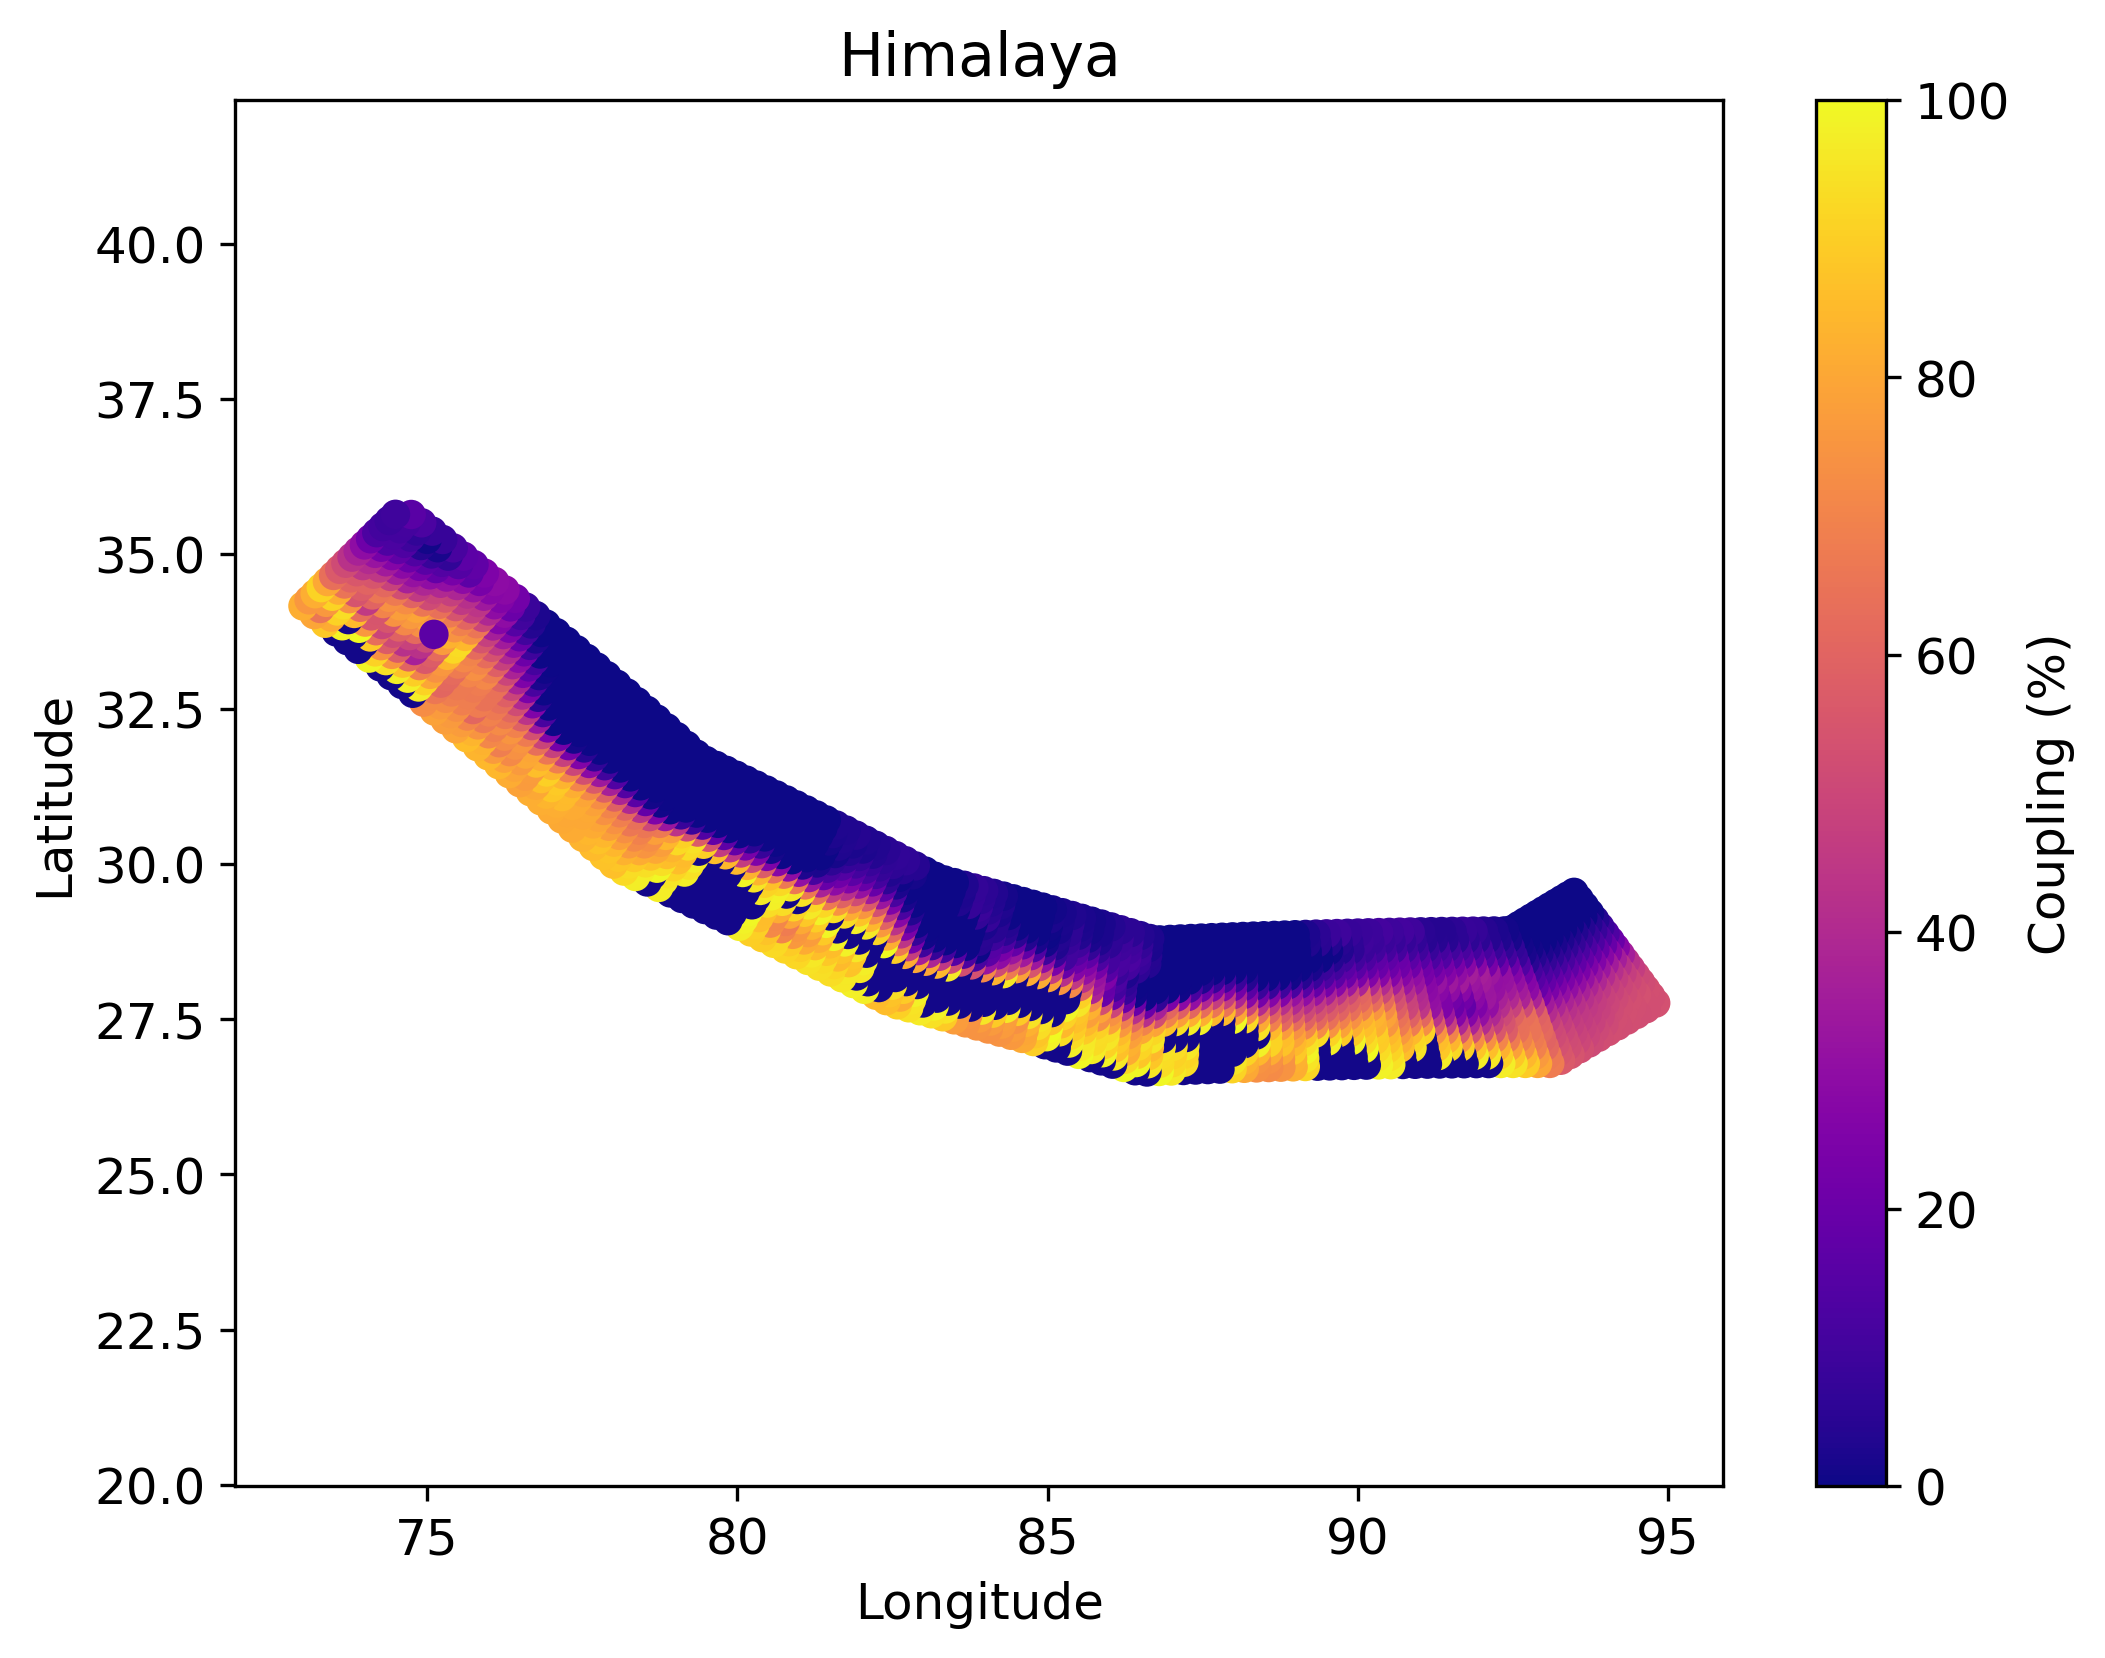

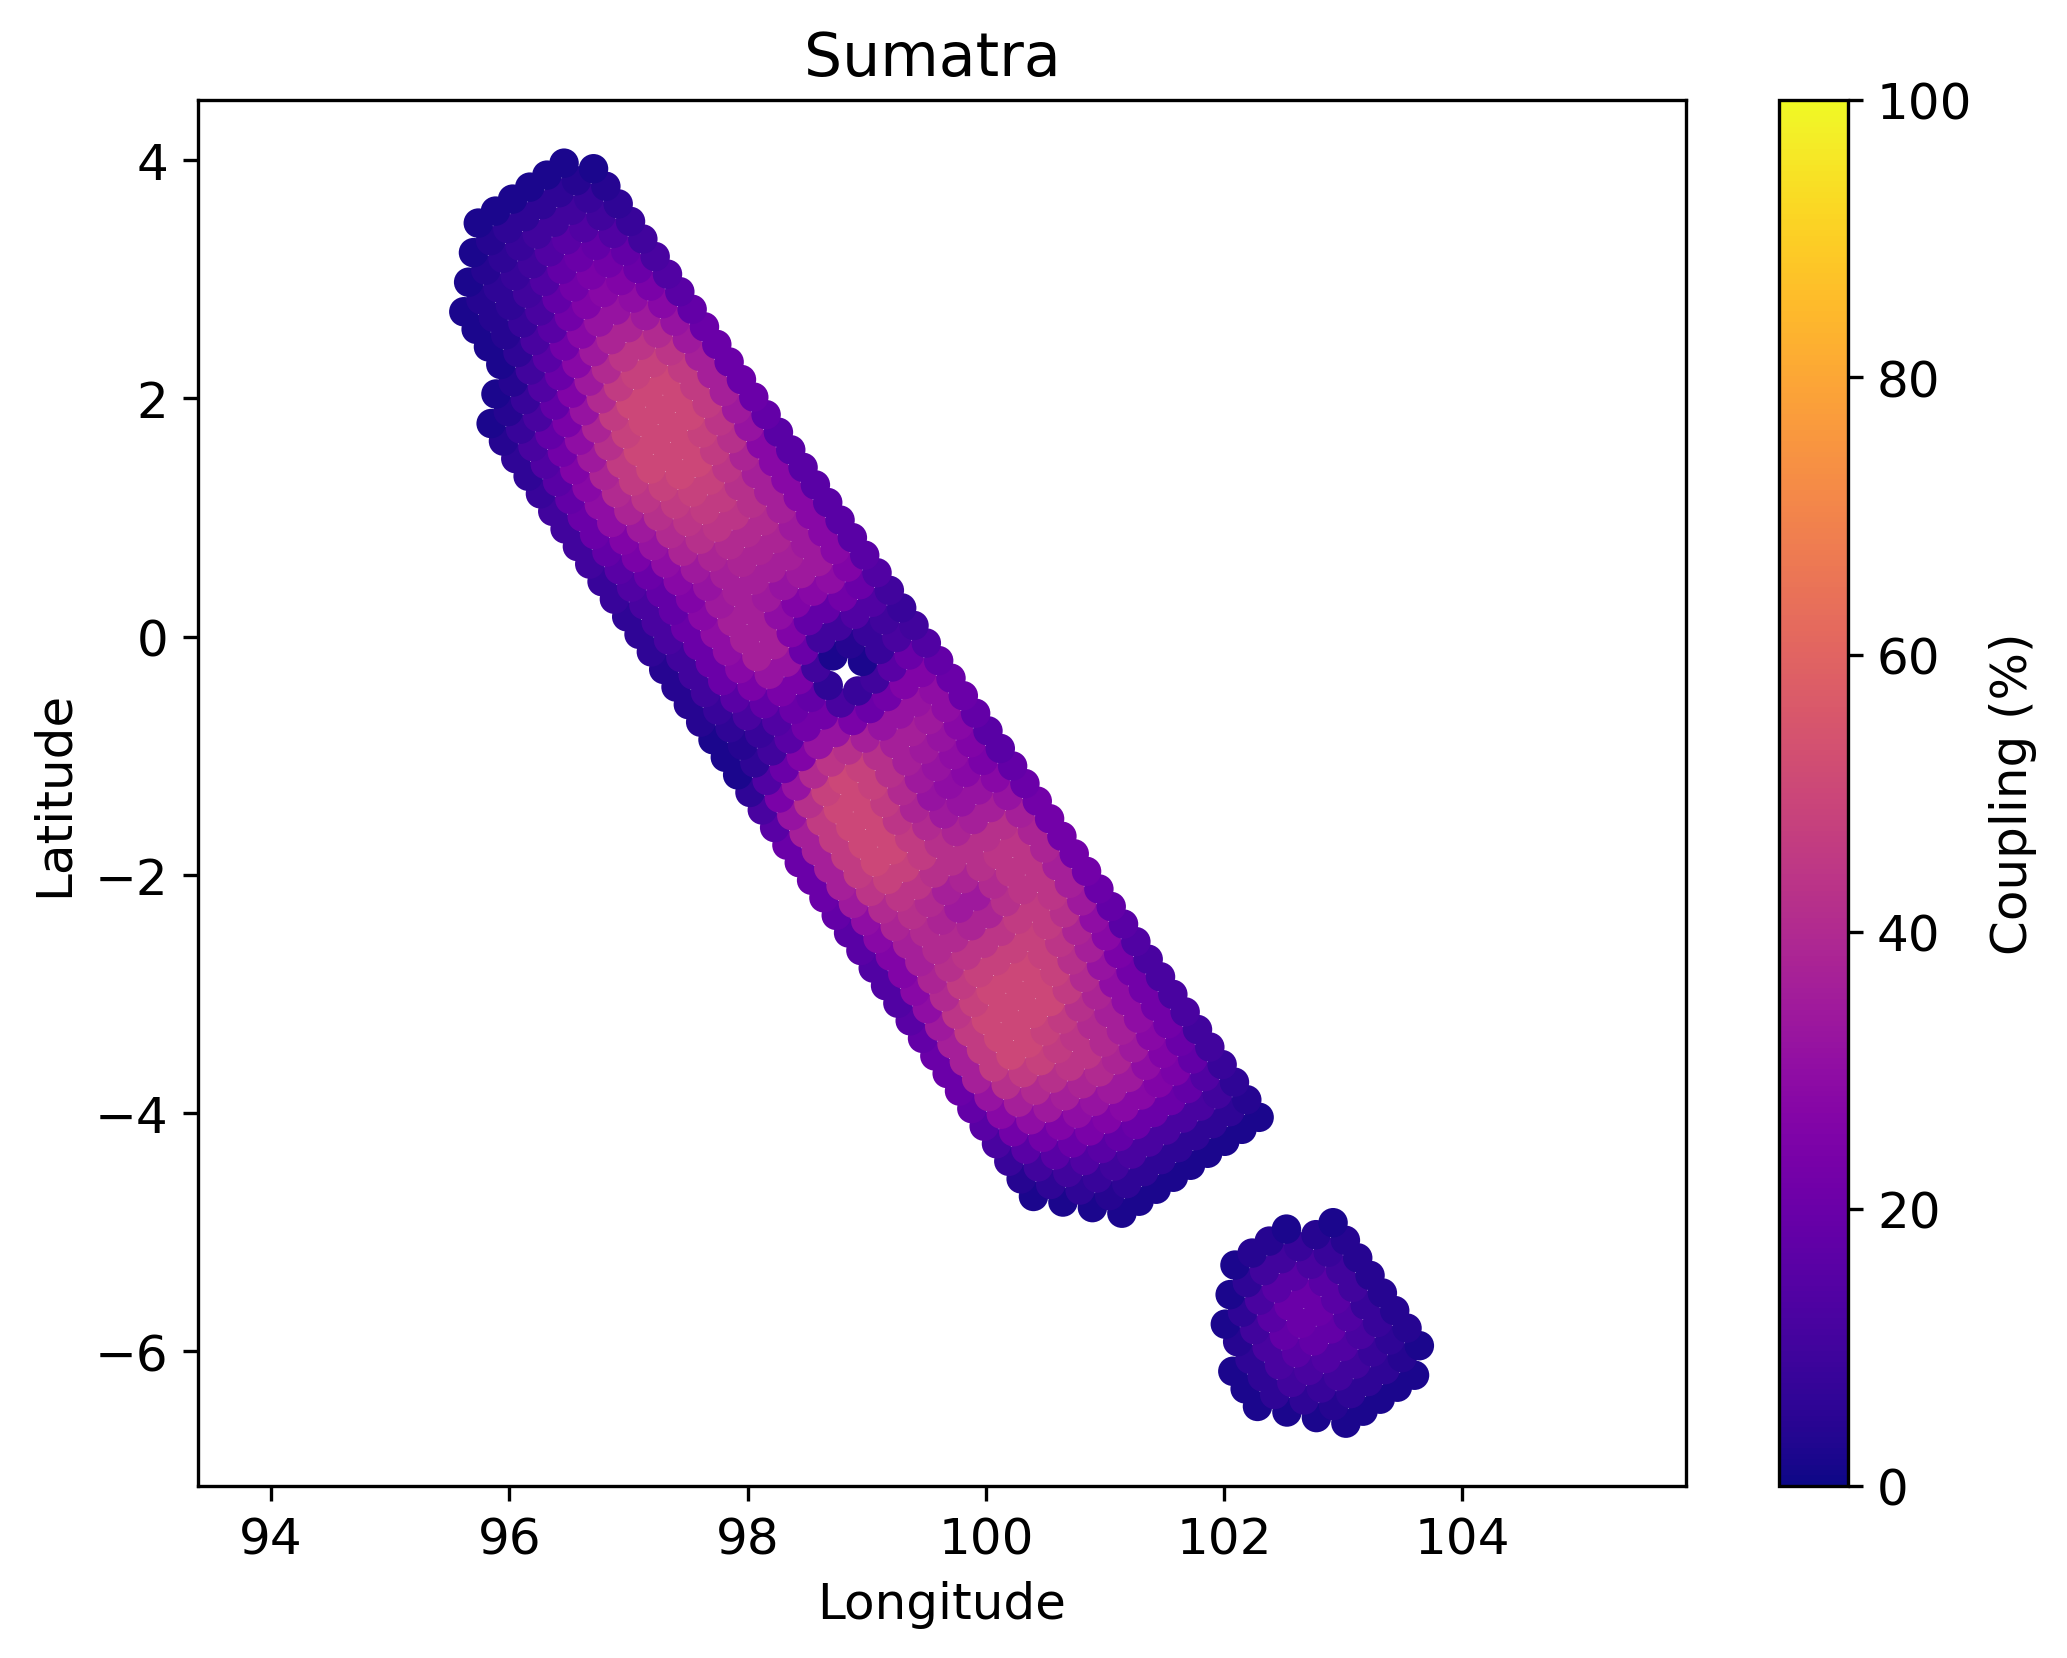

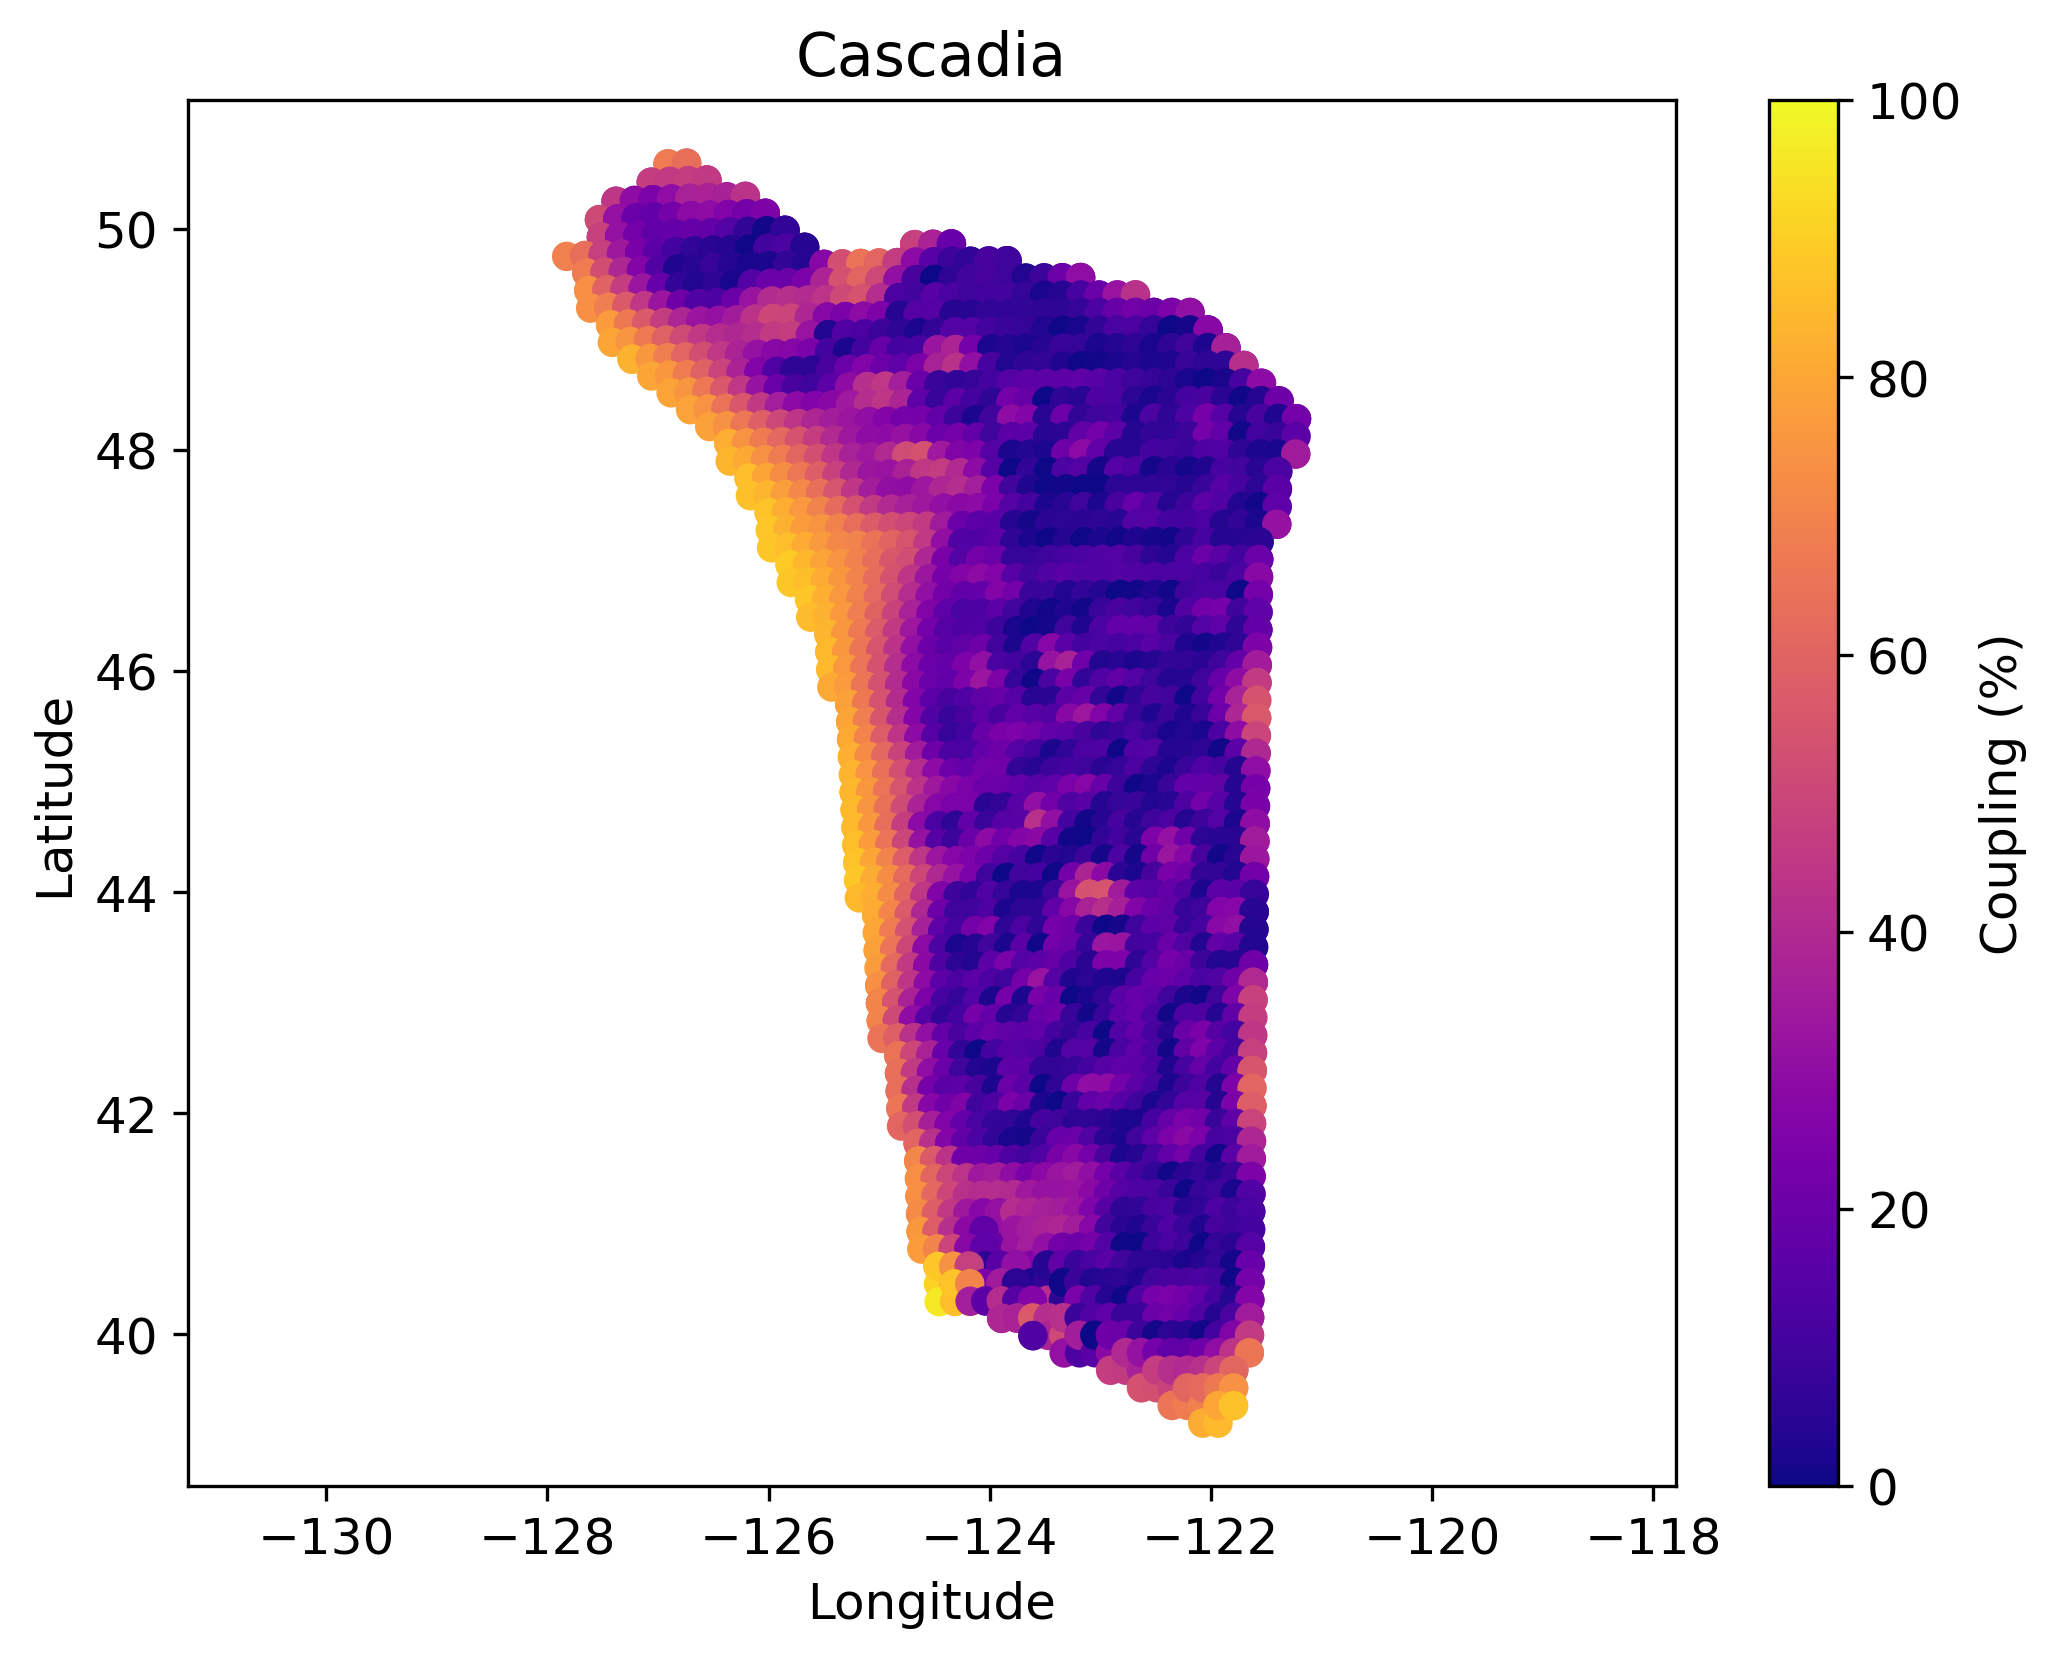

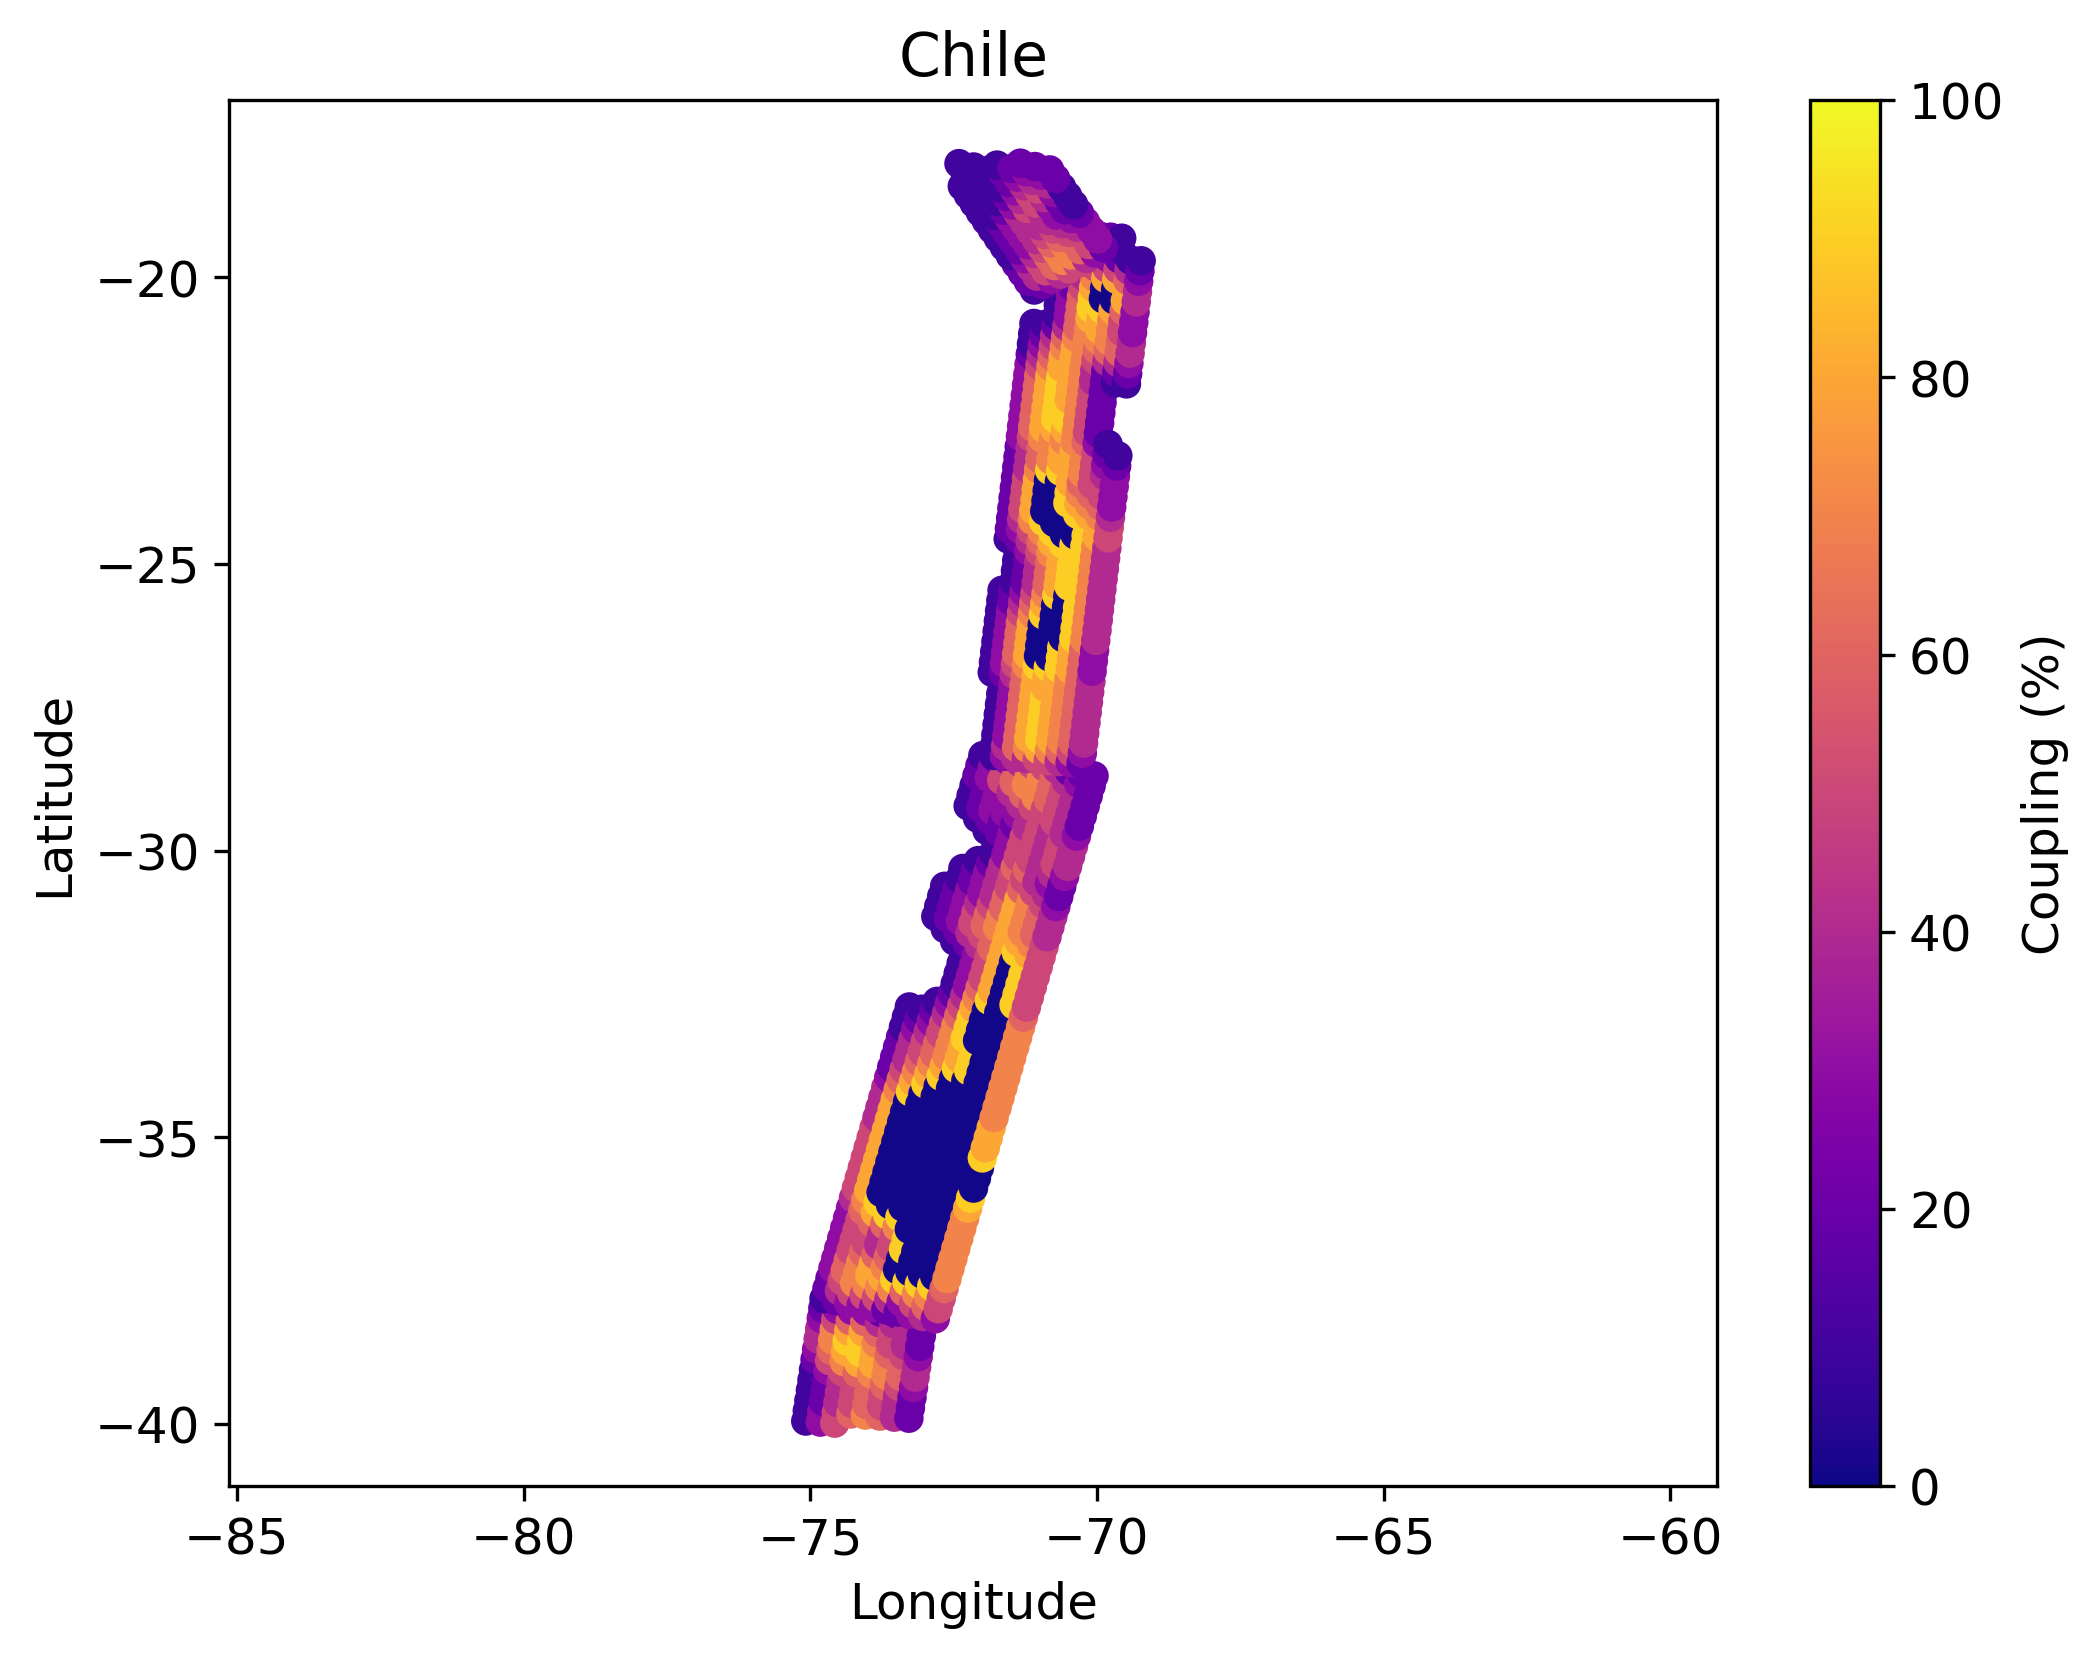

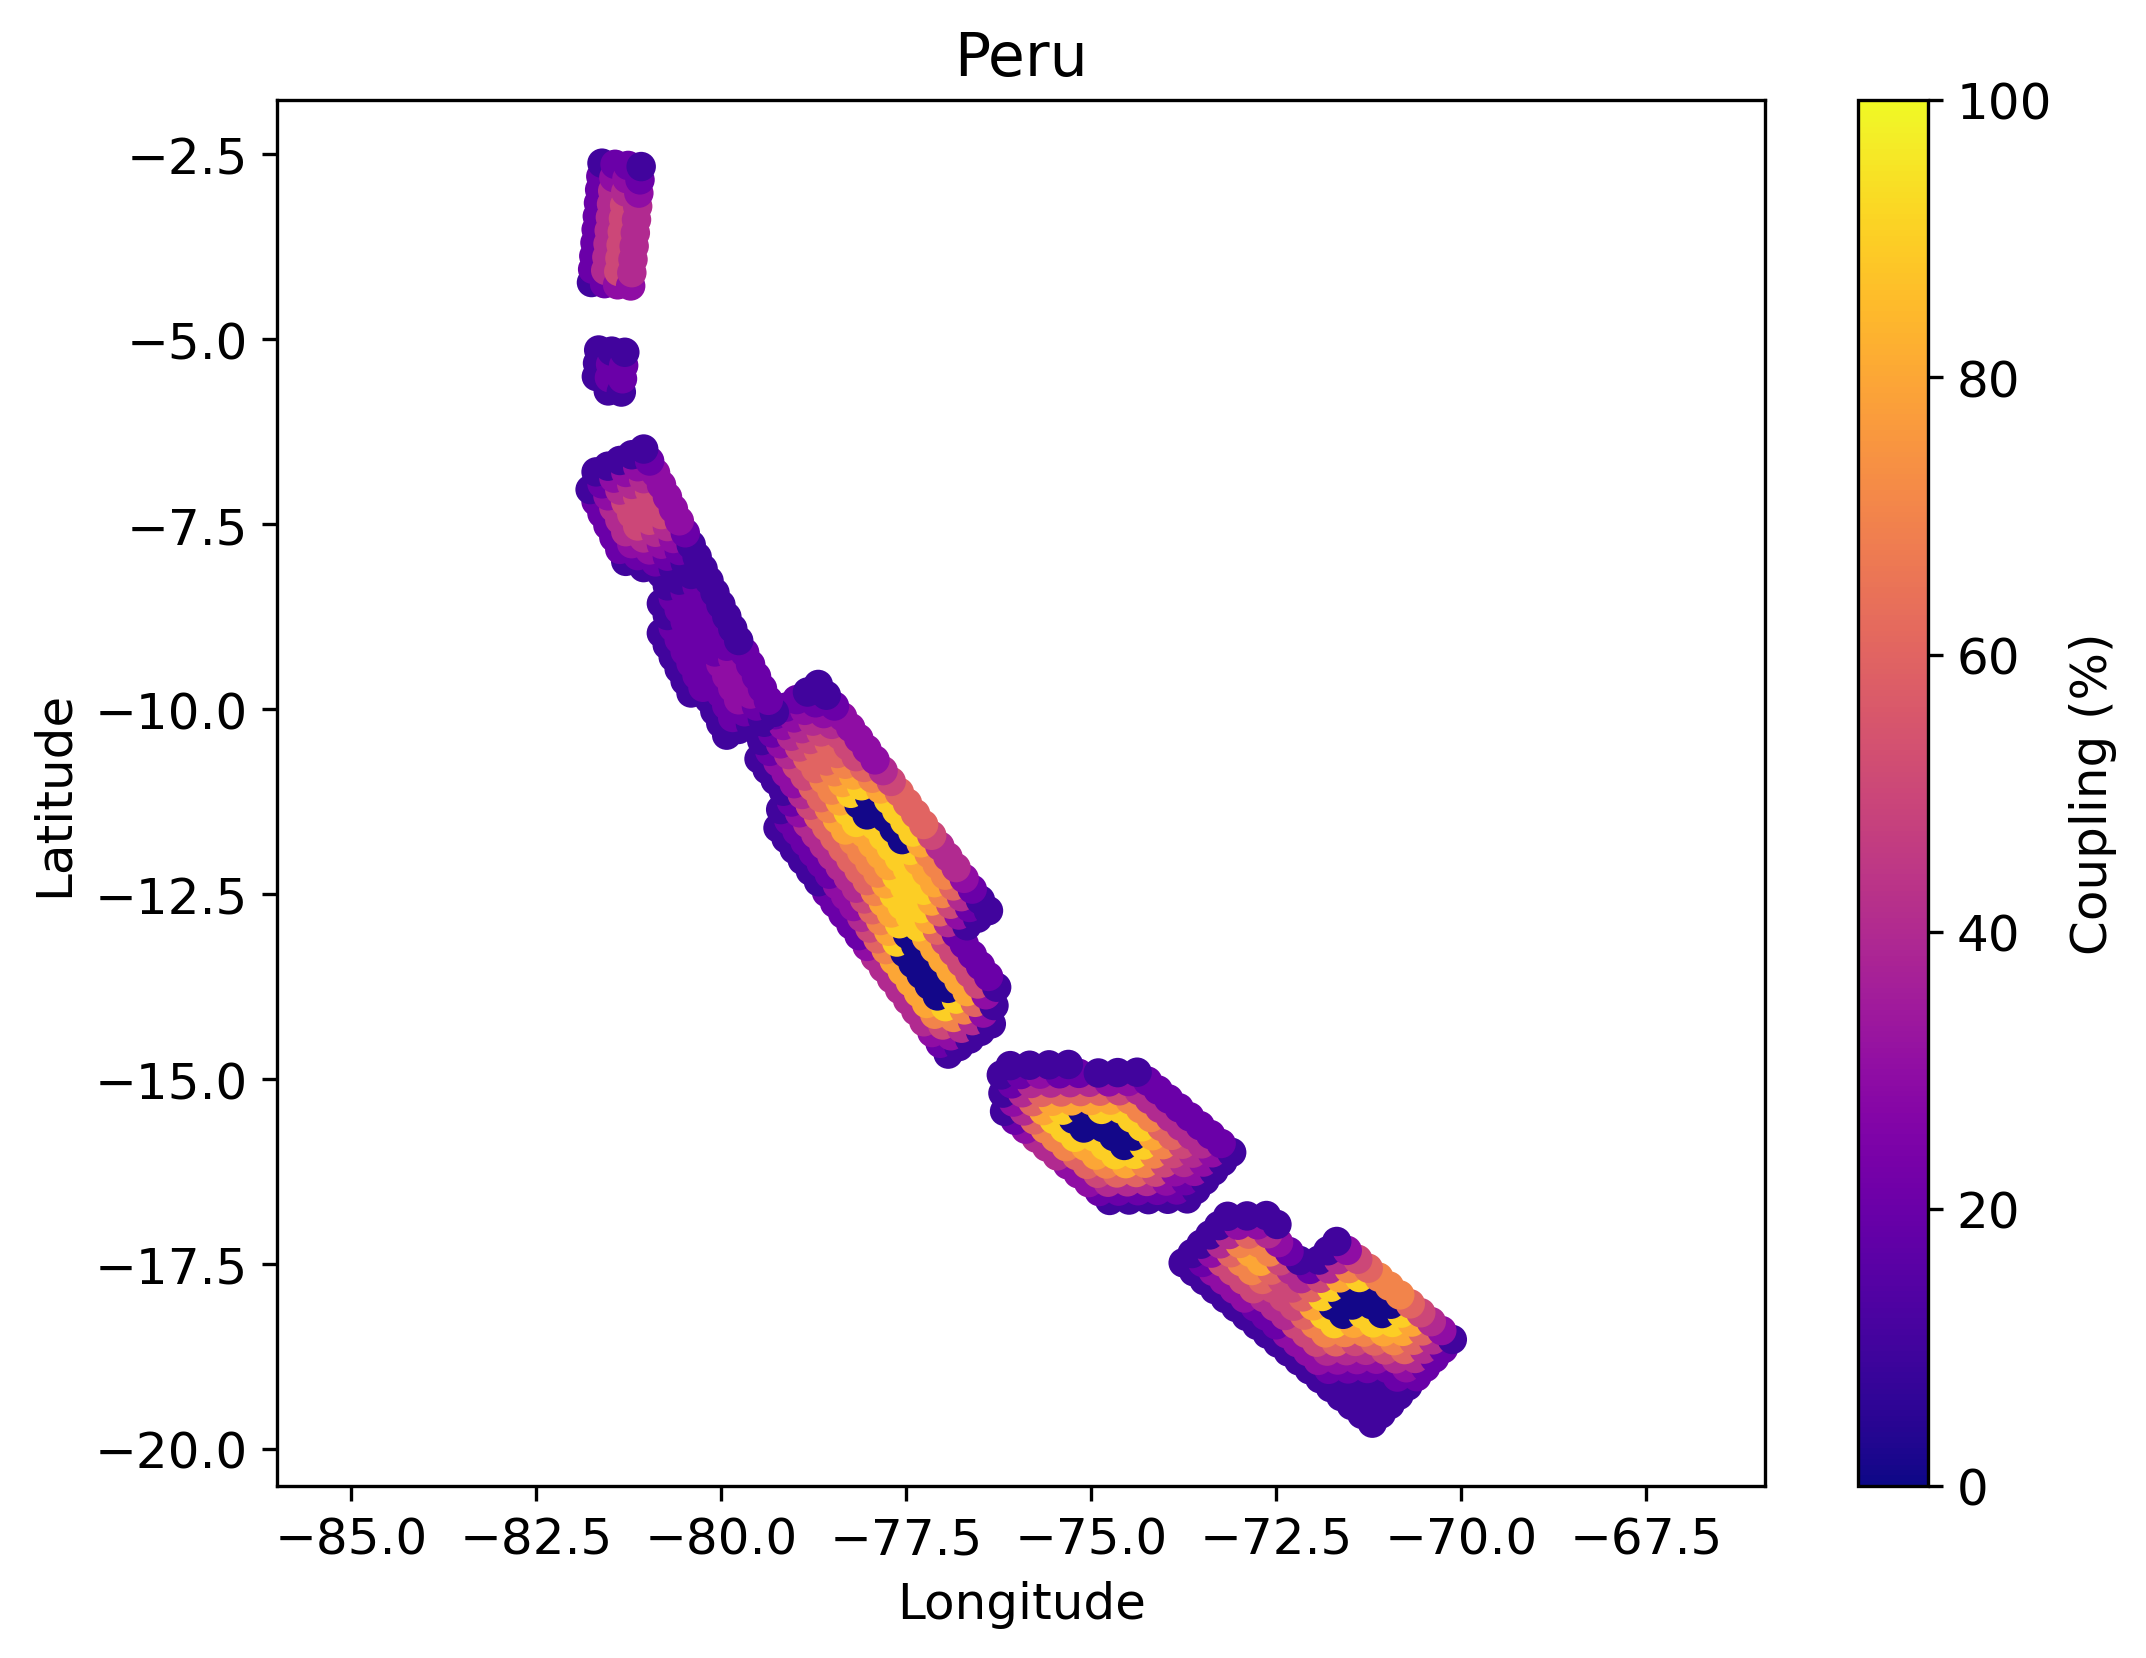

In [3]:
subduction_zones = interseismic_coupling['Subduction zone'].unique()

for zone in subduction_zones:
    subset = interseismic_coupling[interseismic_coupling['Subduction zone'] == zone]
    subset.loc[interseismic_coupling['Coupling'] < 1, 'Coupling'] *= 100

    plt.figure(figsize=(8, 6),dpi=300)
   
    # Scatter plot
    scatter = plt.scatter(
        subset['Lon'],
        subset['Lat'],
        c=subset['Coupling'],
        cmap='plasma',  
        marker='o',
        s=50, 
        alpha=1,
        vmin=0,
        vmax=100, 
        edgecolors='none'
    )


    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.axis('equal')
    plt.title(zone)
    cbar = plt.colorbar(scatter,label='Coupling (%)')

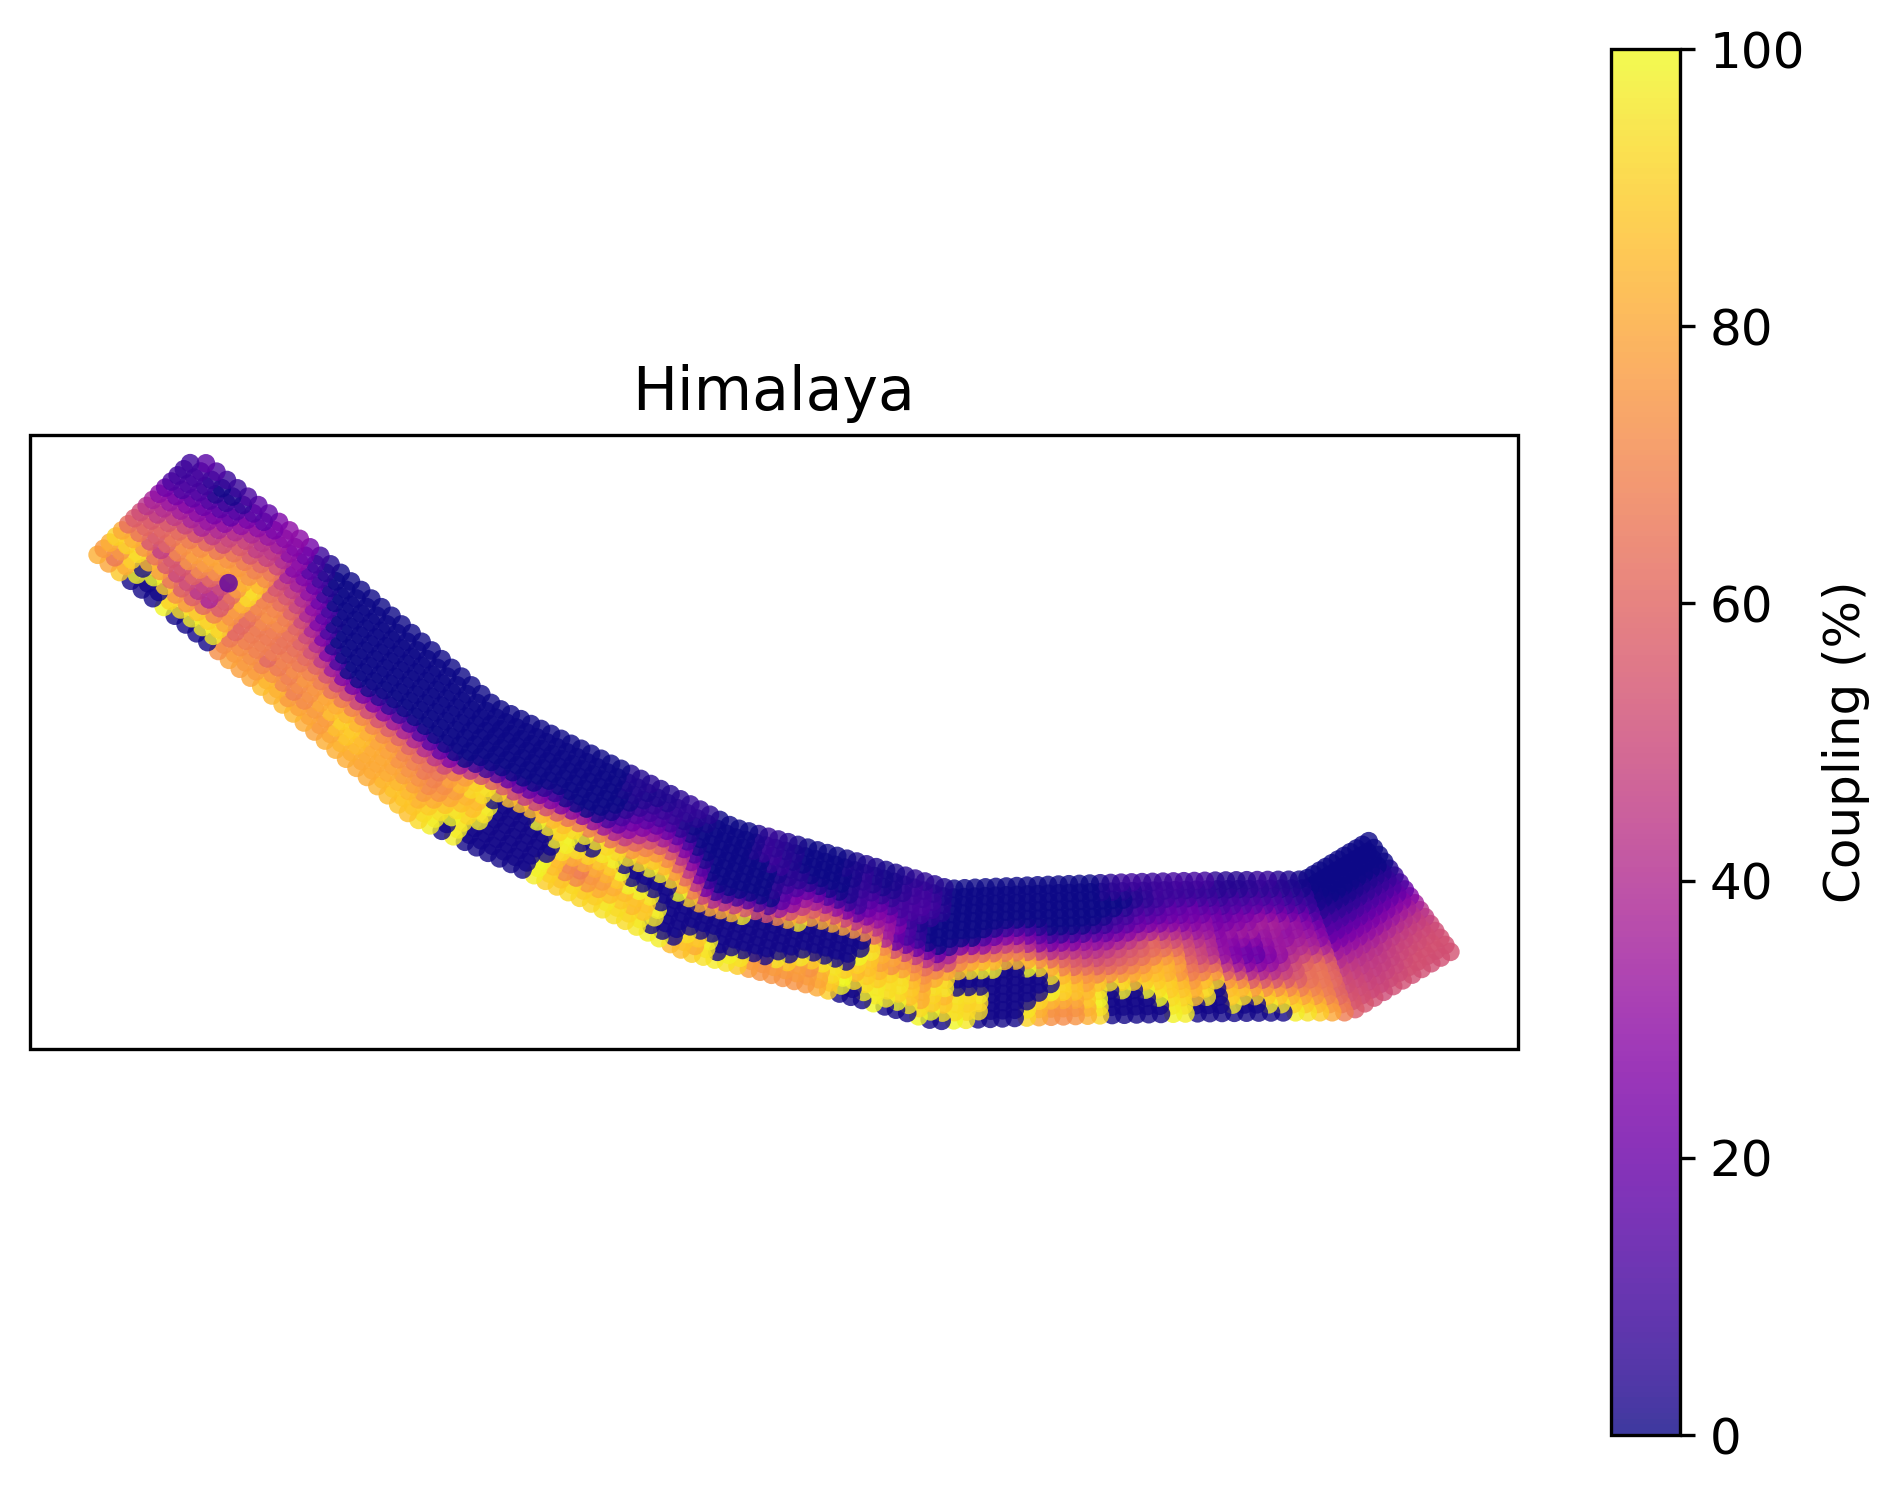

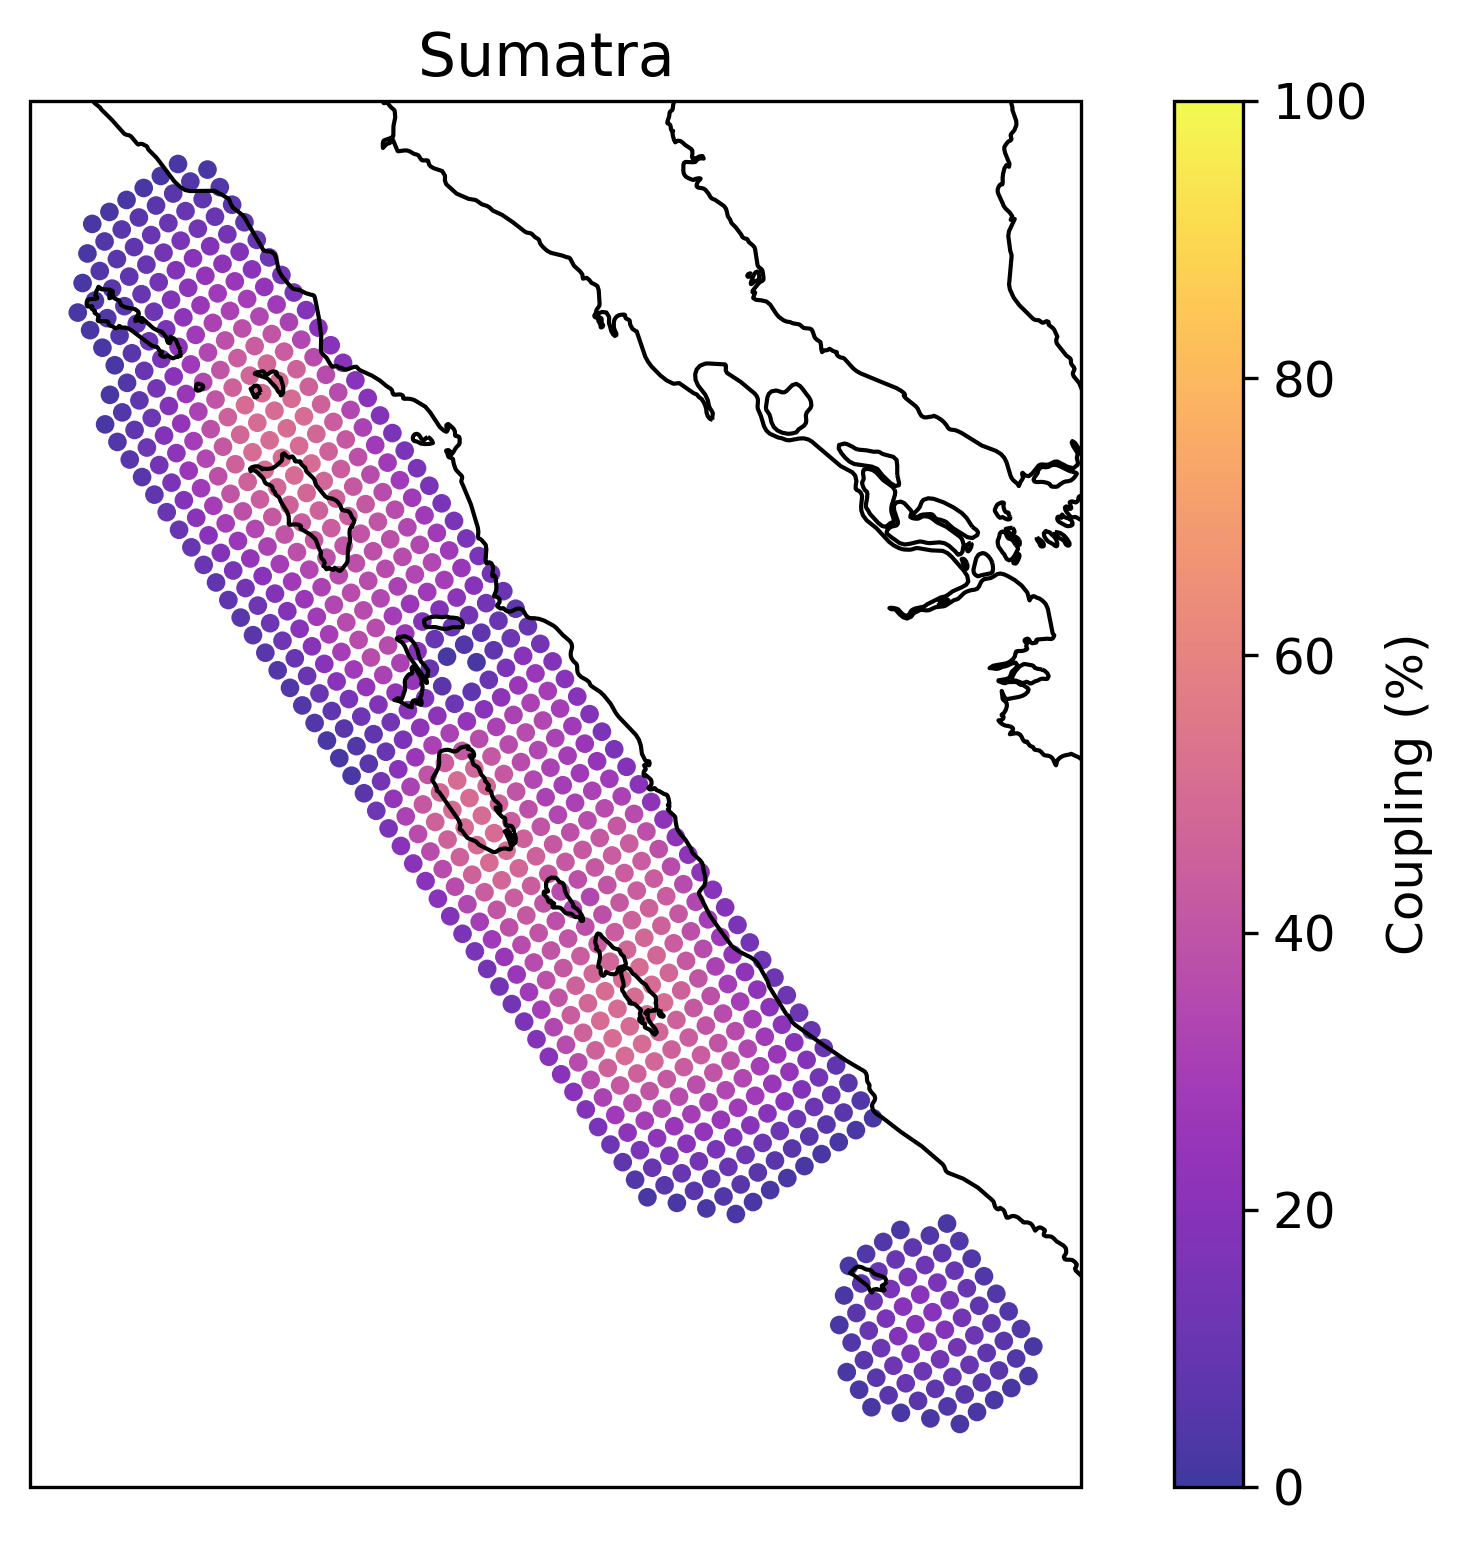

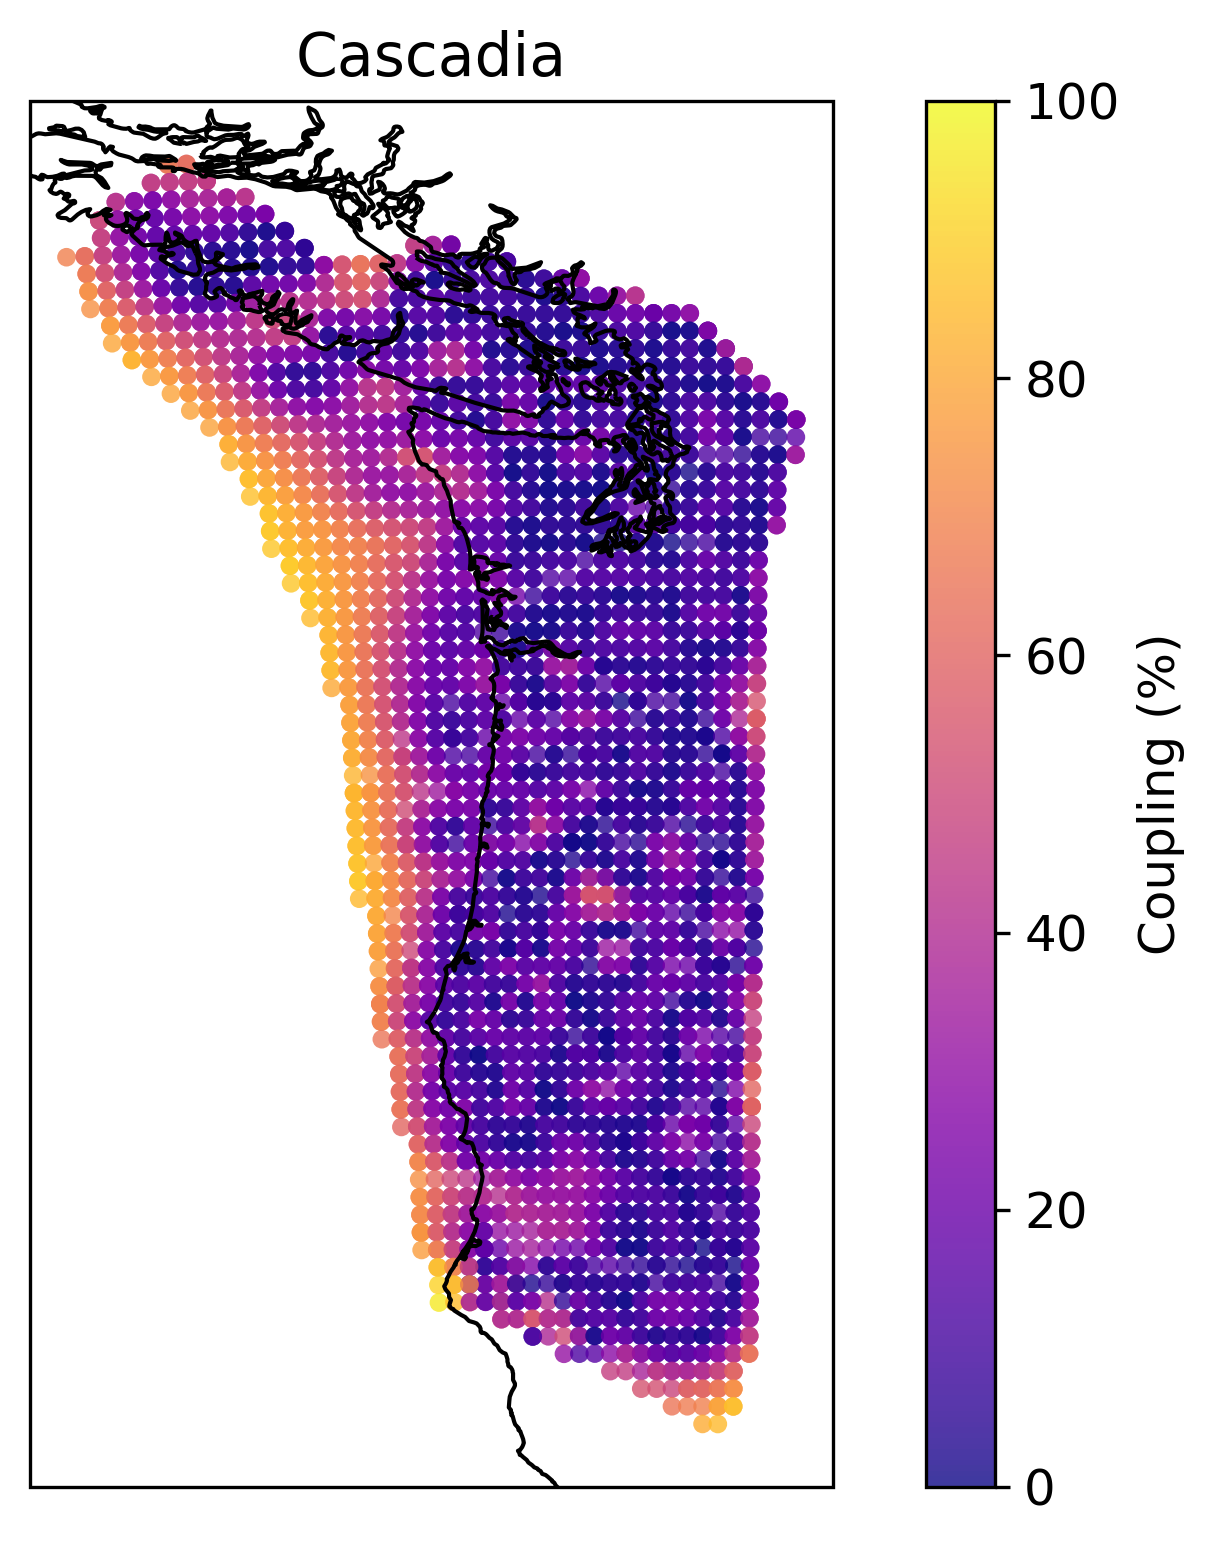

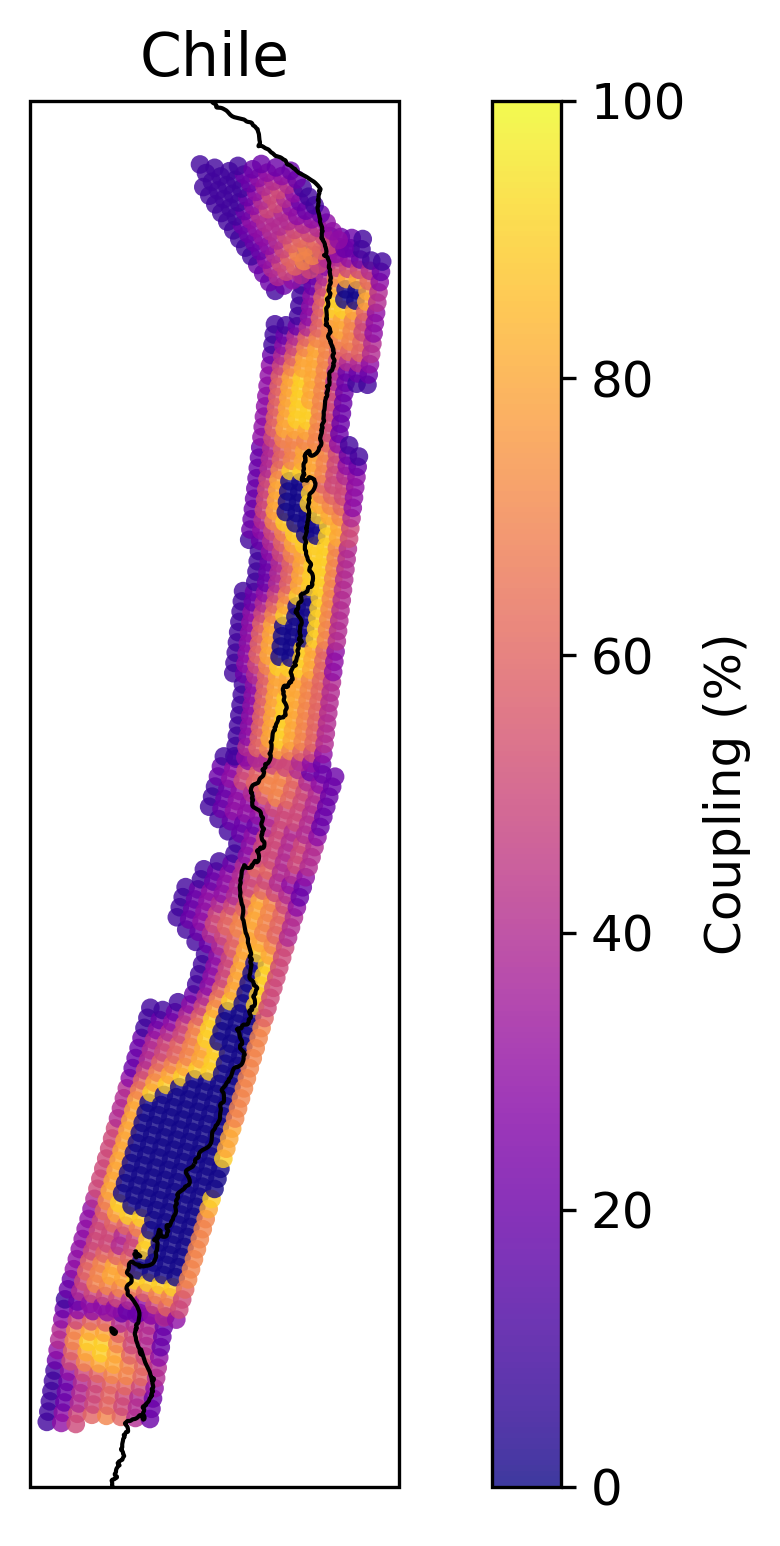

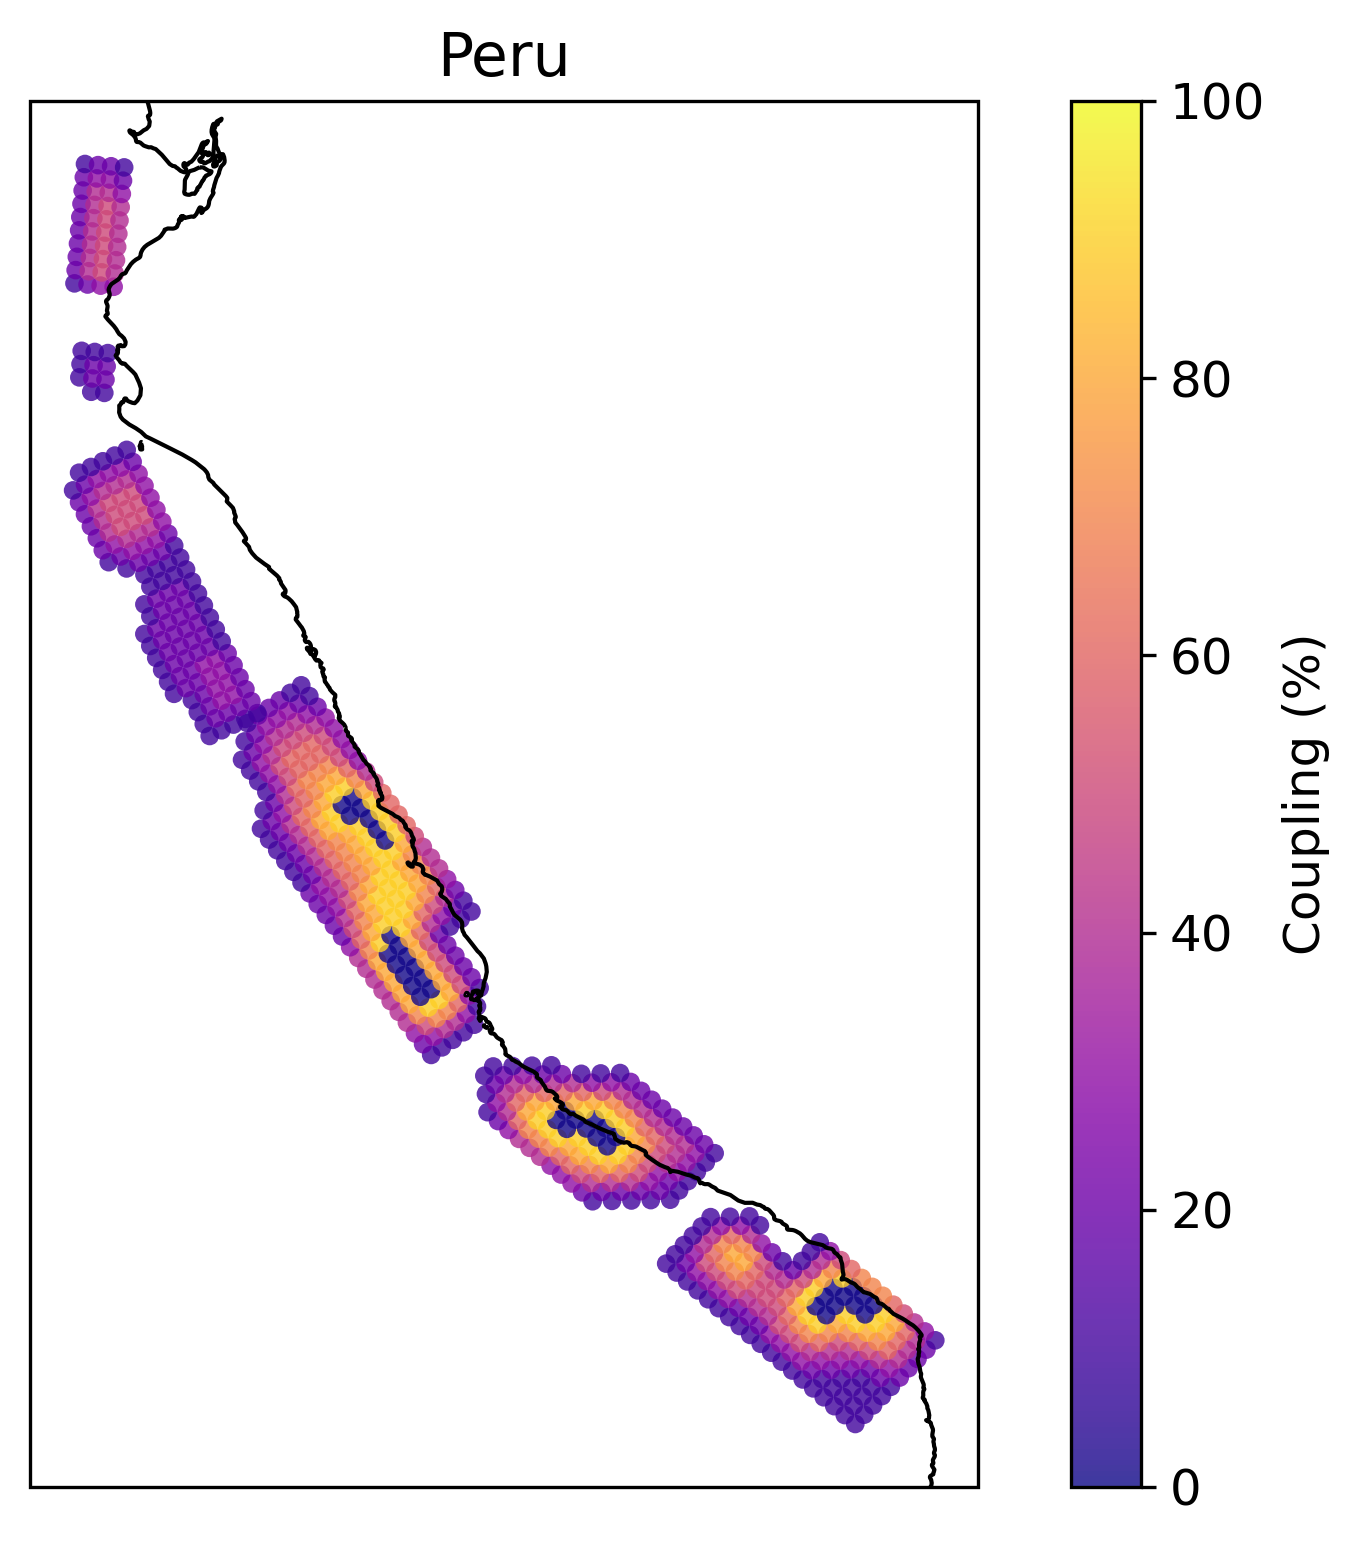

In [4]:
subduction_zones = interseismic_coupling['Subduction zone'].unique()

# Loop through each subduction zone and create scatter plots with coastline
for zone in subduction_zones:
    subset = interseismic_coupling[interseismic_coupling['Subduction zone'] == zone]
    subset.loc[interseismic_coupling['Coupling'] < 1, 'Coupling'] *= 100

    fig, ax = plt.subplots(figsize=(8, 6), dpi=300, subplot_kw=dict(projection=ccrs.PlateCarree()))
   
    scatter = ax.scatter(
        subset['Lon'],
        subset['Lat'],
        c=subset['Coupling'],
        cmap='plasma',  
        marker='o',
        s=20,  
        alpha=0.8,
        vmin=0,
        vmax=100, 
        edgecolors='none',
        transform=ccrs.PlateCarree()
    )

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(zone)
    ax.coastlines()
    cbar = plt.colorbar(scatter, label='Coupling (%)')
    plt.show()
